# 2-- Forecasting
- Univariate
- Univariate with exogenous variables
- Multivariate

In [1]:
from warnings import simplefilter
simplefilter(action="ignore", category=RuntimeWarning)

## Univariate forecasting
The basic workflow
1. Specify data
2. Specify task
3. Specify model
4. Fit
5. Predict

### Data

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of shampoo sales'>)

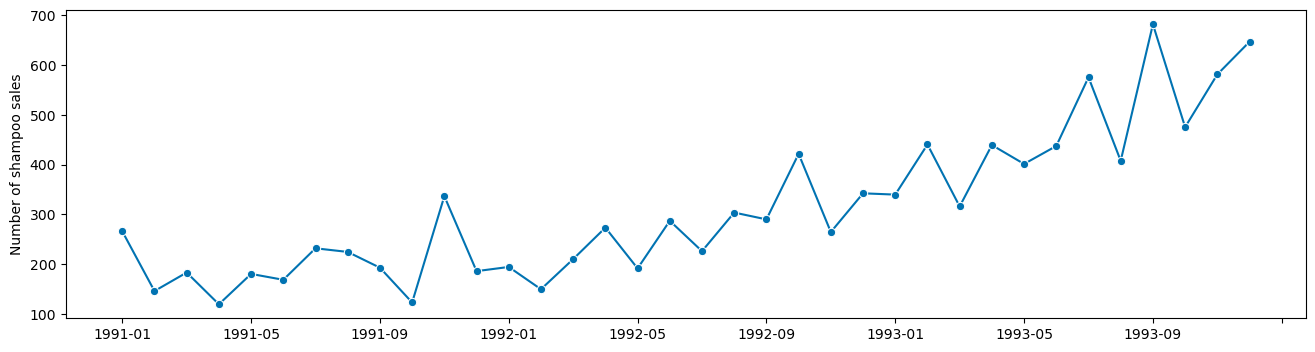

In [2]:
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series

y = load_shampoo_sales()

plot_series(y)

### Task specification

Next we will define a forecasting task.

We will try to predict the last 6 months of data, using the previous data as training data. Each point in the series represents a month, so we should hold out the last 6 points as test data, and use 6-step ahead forecasting horizon to evaluate forecasting performance.
We will use the MAPE (mean absolute percentage error) to quantify the accuracy of our forecasts. A lower MAPE means higher accuracy.

### The forecasting horizon
When we want to generate forecasts, we need to specify the forecasting horizon and pass that to our forecasting algorithm. We can specify the forecasting horizon as a numpy array of the steps ahead relative to the end of the training series:

In [3]:
# Using an array of values
import numpy as np

fh = np.arange(6) + 1
fh

array([1, 2, 3, 4, 5, 6])

In [4]:
# Using the Forecasting Horizon object
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(
    pd.period_range("1993-07", periods=6, freq="M"), is_relative=False
)
fh

ForecastingHorizon(['1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]', is_relative=False)

In [5]:
cutoff = pd.Period("1993-06", freq="M")
fh.to_relative(cutoff)

ForecastingHorizon([1, 2, 3, 4, 5, 6], dtype='int64', is_relative=True)

In [6]:
# Train-test split
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of shampoo sales'>)

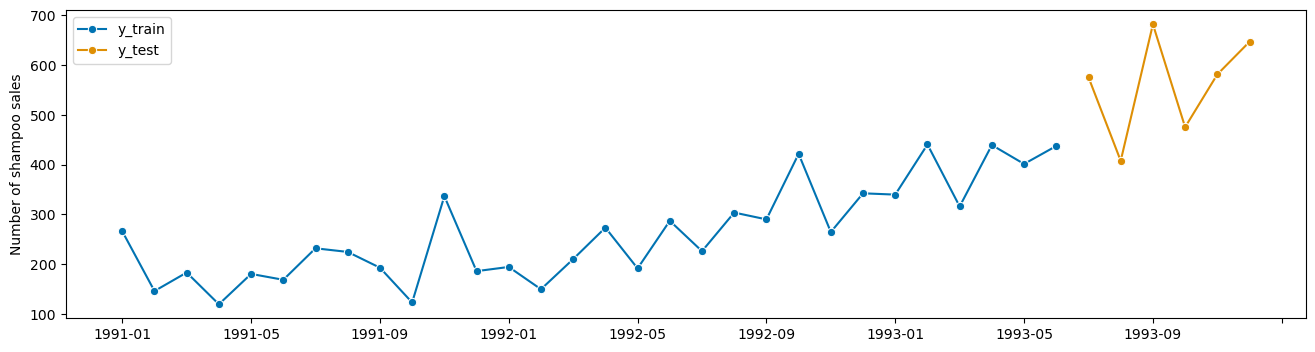

In [7]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [8]:
# Model specification
from sktime.forecasting.naive import NaiveForecaster

In [9]:
forecaster = NaiveForecaster(strategy="drift", window_length=10)

In [10]:
# Fitting
forecaster.fit(y_train)

NaiveForecaster(strategy='drift', window_length=10)

In [13]:
forecaster.fit?

Signature: forecaster.fit(y, X=None, fh=None)
Docstring:
Fit forecaster to training data.

State change:
    Changes state to "fitted".

Writes to self:
    Sets self._is_fitted flag to True.
    Writes self._y and self._X with `y` and `X`, respectively.
    Sets self.cutoff and self._cutoff to last index seen in `y`.
    Sets fitted model attributes ending in "_".
    Stores fh to self.fh if fh is passed.

Parameters
----------
y : time series in sktime compatible data container format
        Time series to which to fit the forecaster.
    y can be in one of the following formats:
    Series scitype: pd.Series, pd.DataFrame, or np.ndarray (1D or 2D)
        for vanilla forecasting, one time series
    Panel scitype: pd.DataFrame with 2-level row MultiIndex,
        3D np.ndarray, list of Series pd.DataFrame, or nested pd.DataFrame
        for global or panel forecasting
    Hierarchical scitype: pd.DataFrame with 3 or more level row MultiIndex
        for hierarchical forecasting
   

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of shampoo sales'>)

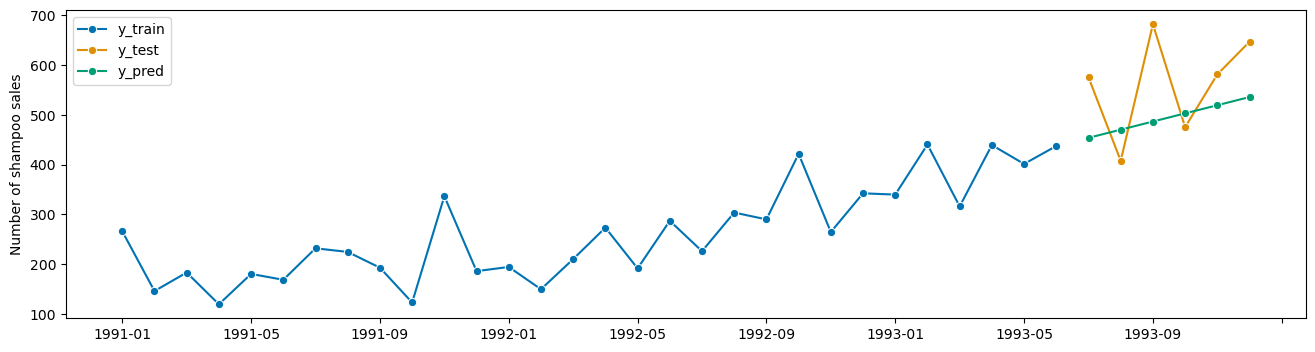

In [12]:
# Prediction
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [21]:
# Evaluation
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred, symmetric=False) 

0.16469764622516225

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of shampoo sales'>)

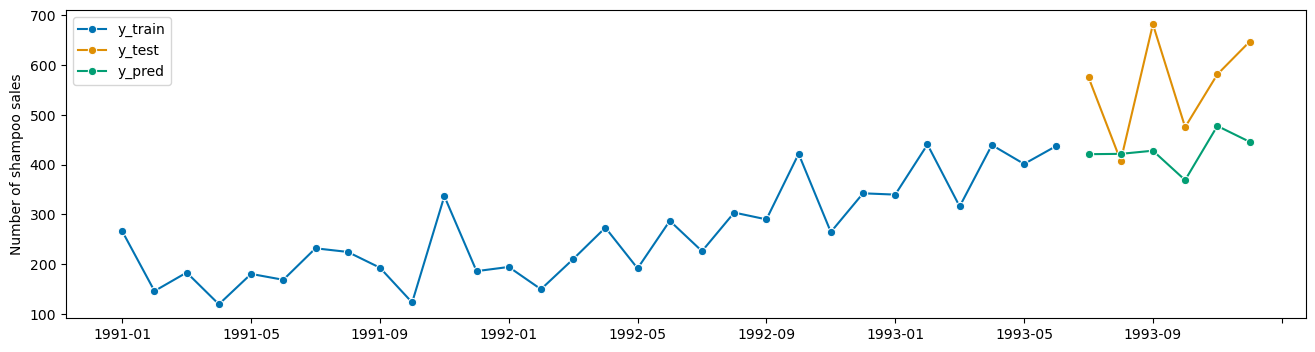

In [14]:
# Another example
from sktime.forecasting.arima import AutoARIMA

y = load_shampoo_sales()
y_train, y_test = temporal_train_test_split(y, fh=fh)
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

### Summary of basic workflow
- single, fixed cutoff point as which we generate predictions
- common interface for forecasters

### Forecasters in sktime

In [15]:
from sktime.registry import all_estimators

In [16]:
all_estimators("forecaster", as_dataframe=True)

/opt/conda/envs/sktime-pydata/lib/python3.9/site-packages/sktime/utils/validation/_dependencies.py:113: UserWarning: str requires package 'dtw-python' to be present in the python environment, but 'dtw-python' was not found. 'dtw-python' is a soft dependency and not included in the base sktime installation. Please run: `pip install dtw-python` to install the dtw-python package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
/opt/conda/envs/sktime-pydata/lib/python3.9/site-packages/sktime/utils/validation/_dependencies.py:163: UserWarning: tensorflow
  warnings.warn(msg)
/opt/conda/envs/sktime-pydata/lib/python3.9/site-packages/sktime/utils/validation/_dependencies.py:113: UserWarning: No module named 'esig'. 'esig' is a soft dependency and not included in the sktime installation. Please run: `pip install esig` to install the esig package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
/opt/conda/

,name,estimator
0,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
1,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
2,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
3,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
4,BATS,<class 'sktime.forecasting.bats.BATS'>
5,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
6,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
7,Croston,<class 'sktime.forecasting.croston.Croston'>
8,DirRecTabularRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
9,DirRecTimeSeriesRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

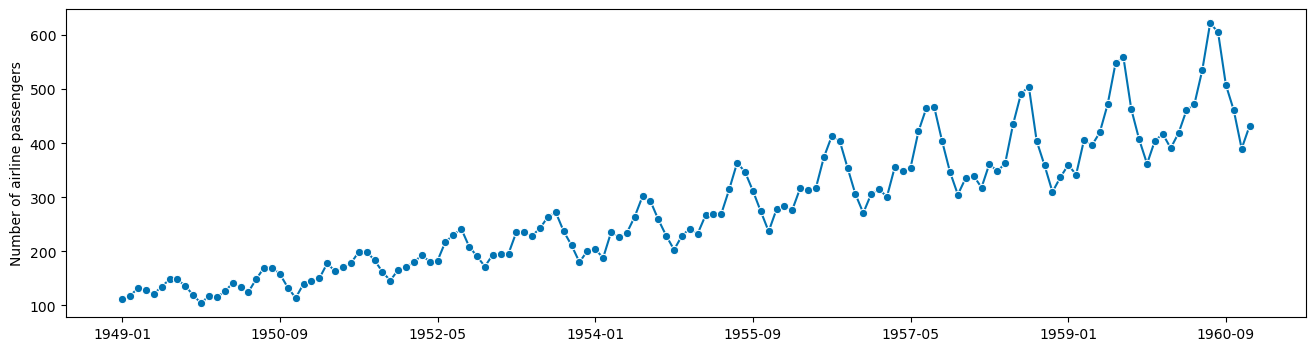

In [18]:
 from sktime.datasets import load_airline
 from sktime.utils.plotting import plot_series

 y = load_airline()
 plot_series(y)

In [19]:
y_train, y_test = temporal_train_test_split(y, test_size=12)
fh = ForecastingHorizon(y_test.index, is_relative=False)

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

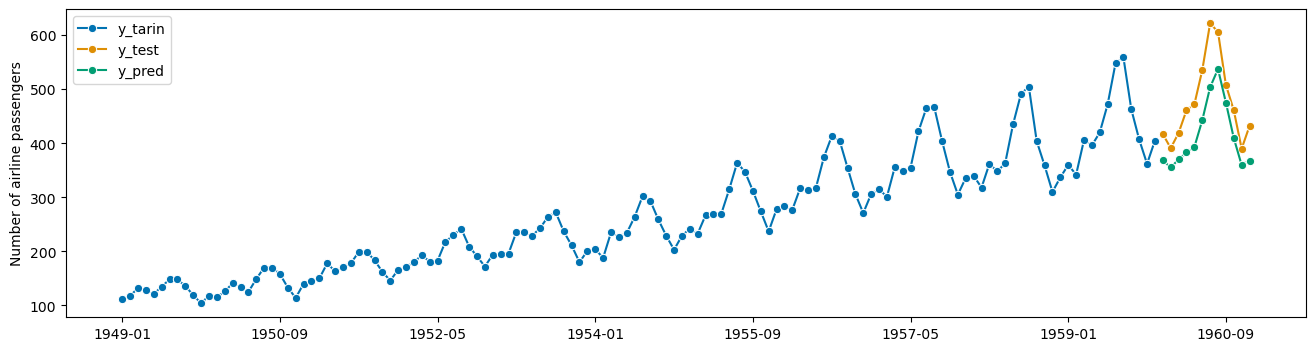

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction

regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, strategy='recursive', window_length=12)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict()
plot_series(y_train, y_test, y_pred, labels=["y_tarin", "y_test", "y_pred"])

## The more advanced workflow
1. Specify data
2. Specify task
3. Specify model
4. Fit
5. Predict
6. Observe new data
7. Update using new data
8. Repeat steps 5-7 as often as required  

### Data specification

In [23]:
from sktime.forecasting.ets import AutoETS

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

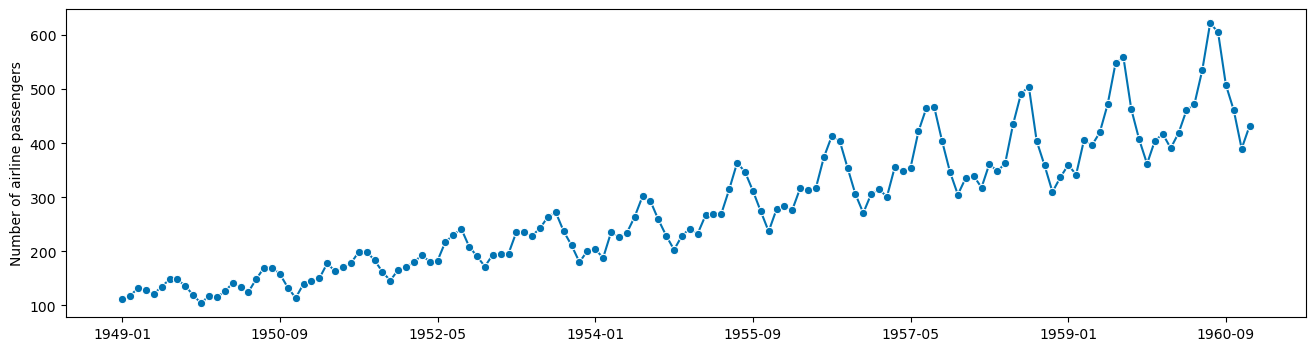

In [24]:
# specifying the data
y = load_airline()
plot_series(y)

### Task specification  

In [26]:
# specifying the forecasting horizon: one year ahead, all months
fh = np.arange(1, 13)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [41]:
# in December 1975
# this is the data known in December 1975
y_train = y.loc[:"1957-08"]
y_observed = y_train.copy()
y_observed.tail()

1957-04    348.0
1957-05    355.0
1957-06    422.0
1957-07    465.0
1957-08    467.0
Freq: M, Name: Number of airline passengers, dtype: float64

### Model specification

In [28]:
# specifying the model
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

### Fitting

In [30]:
# fit
forecaster.fit(y_train)

AutoETS(auto=True, n_jobs=-1, sp=12)

### Prediction

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

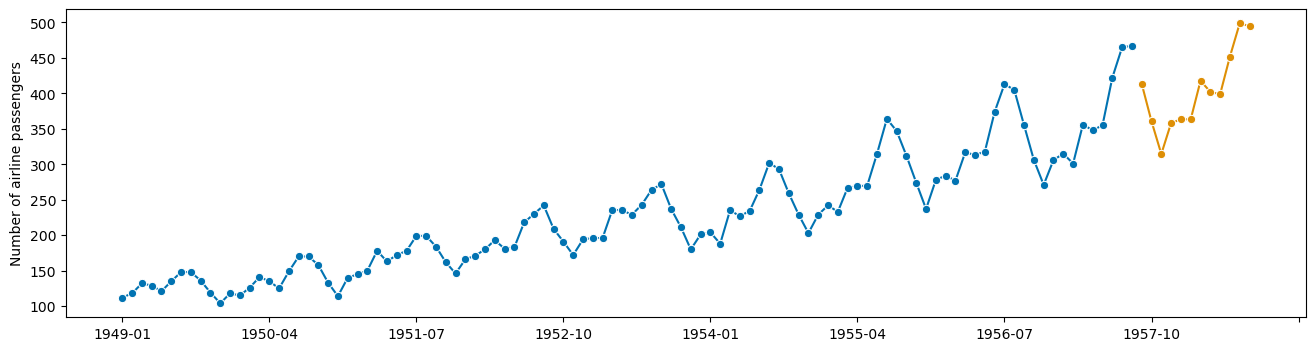

In [31]:
# Predict for Jan 1958 - Dec 1958
y_pred = forecaster.predict(fh)
plot_series(y_observed, y_pred)

In [32]:
y_pred

1957-09    413.464169
1957-10    360.568570
1957-11    314.503935
1957-12    358.256837
1958-01    363.383593
1958-02    363.448000
1958-03    417.738427
1958-04    402.189897
1958-05    398.844080
1958-06    451.949659
1958-07    498.850616
1958-08    494.790837
Freq: M, dtype: float64

### Observe new data

In [42]:
y_observed = y.loc[:"1957-09"]
new_data = y.loc[["1957-09"]]
new_data

1957-09    404.0
Freq: M, Name: Number of airline passengers, dtype: float64

### Update

In [43]:
forecaster.update(new_data)

/opt/conda/envs/sktime-pydata/lib/python3.9/site-packages/sktime/forecasting/base/_base.py:1640: UserWarning: NotImplementedWarning: AutoETS does not have a custom `update` method implemented. AutoETS will be refit each time `update` is called with update_params=True.
  warn(


AutoETS(auto=True, n_jobs=-1, sp=12)

### Predict again

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

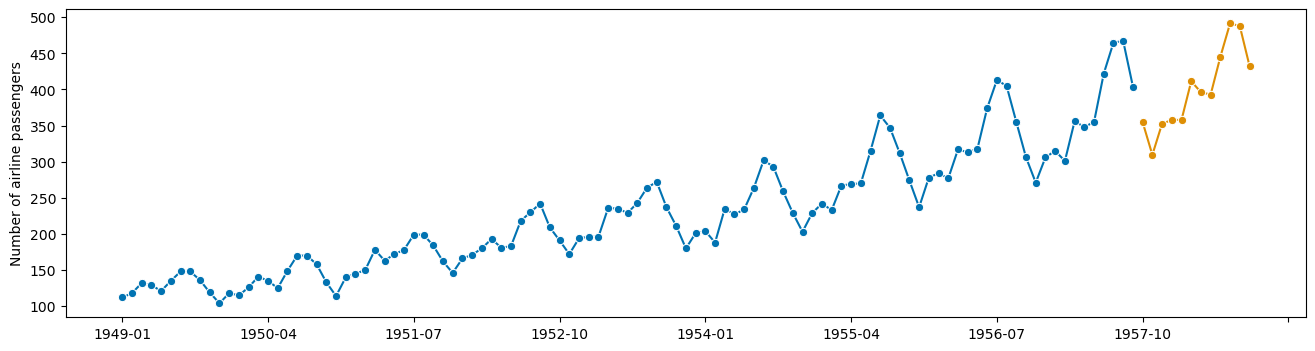

In [44]:
y_pred = forecaster.predict(fh)
plot_series(y_observed, y_pred)

In [45]:
y_pred

1957-10    354.736863
1957-11    309.487026
1957-12    352.614202
1958-01    357.736074
1958-02    357.869577
1958-03    411.395091
1958-04    396.157620
1958-05    392.935649
1958-06    445.334266
1958-07    491.639236
1958-08    487.726588
1958-09    432.515905
Freq: M, dtype: float64

### Understanding update

In [46]:
forecaster.update?

Signature: forecaster.update(y, X=None, update_params=True)
Docstring:
Update cutoff value and, optionally, fitted parameters.

If no estimator-specific update method has been implemented,
default fall-back is as follows:
    update_params=True: fitting to all observed data so far
    update_params=False: updates cutoff and remembers data only

State required:
    Requires state to be "fitted".

Accesses in self:
    Fitted model attributes ending in "_".
    Pointers to seen data, self._y and self.X
    self.cutoff, self._is_fitted
    If update_params=True, model attributes ending in "_".

Writes to self:
    Update self._y and self._X with `y` and `X`, by appending rows.
    Updates self. cutoff and self._cutoff to last index seen in `y`.
    If update_params=True,
        updates fitted model attributes ending in "_".

Parameters
----------
y : time series in sktime compatible data container format
        Time series to which to fit the forecaster in the update.
    y can be in on